#  Wprowadzenie do modelowania w Pythonie cz. 1
importowanie bibliotek i wczytywanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # podział na zbiór treningowy i testowy
from sklearn.linear_model import LinearRegression # model Regresji liniowej
from sklearn.metrics import mean_squared_error, r2_score 
from scipy.stats import pointbiserialr, shapiro

# Wczytanie zbioru IRYS
iris = sns.load_dataset("iris")
print("Podgląd danych IRYS:")
display(iris.head())

# Wczytanie danych CO2
co2 = pd.read_csv("https://raw.githubusercontent.com/jisokolowski/labaJDA/main/input/co2_emmission/CO2_emission.csv")
display(co2)

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Podgląd danych IRYS:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


## Analiza korelacji

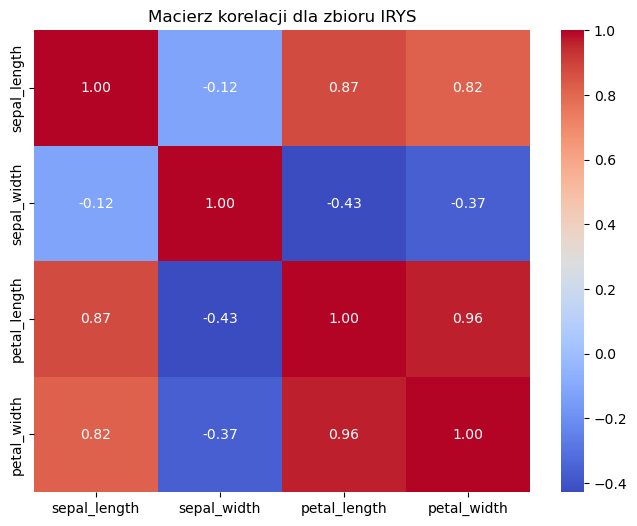

In [2]:
# Analiza korelacji dla zbioru IRYS
correlation_matrix = iris.drop(columns = 'species').corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Macierz korelacji dla zbioru IRYS")
plt.show()

In [8]:
display(pointbiserialr(np.array(iris['species'] == 'setosa'), np.array(iris['sepal_length'])).statistic)
display(pointbiserialr(np.array(iris['species'] == 'versicolor'), np.array(iris['sepal_length'])).statistic)
display(pointbiserialr(np.array(iris['species'] == 'virginica'), np.array(iris['sepal_length'])).statistic)

-0.7174156686860962

0.07939552384344534

0.6380201448426508

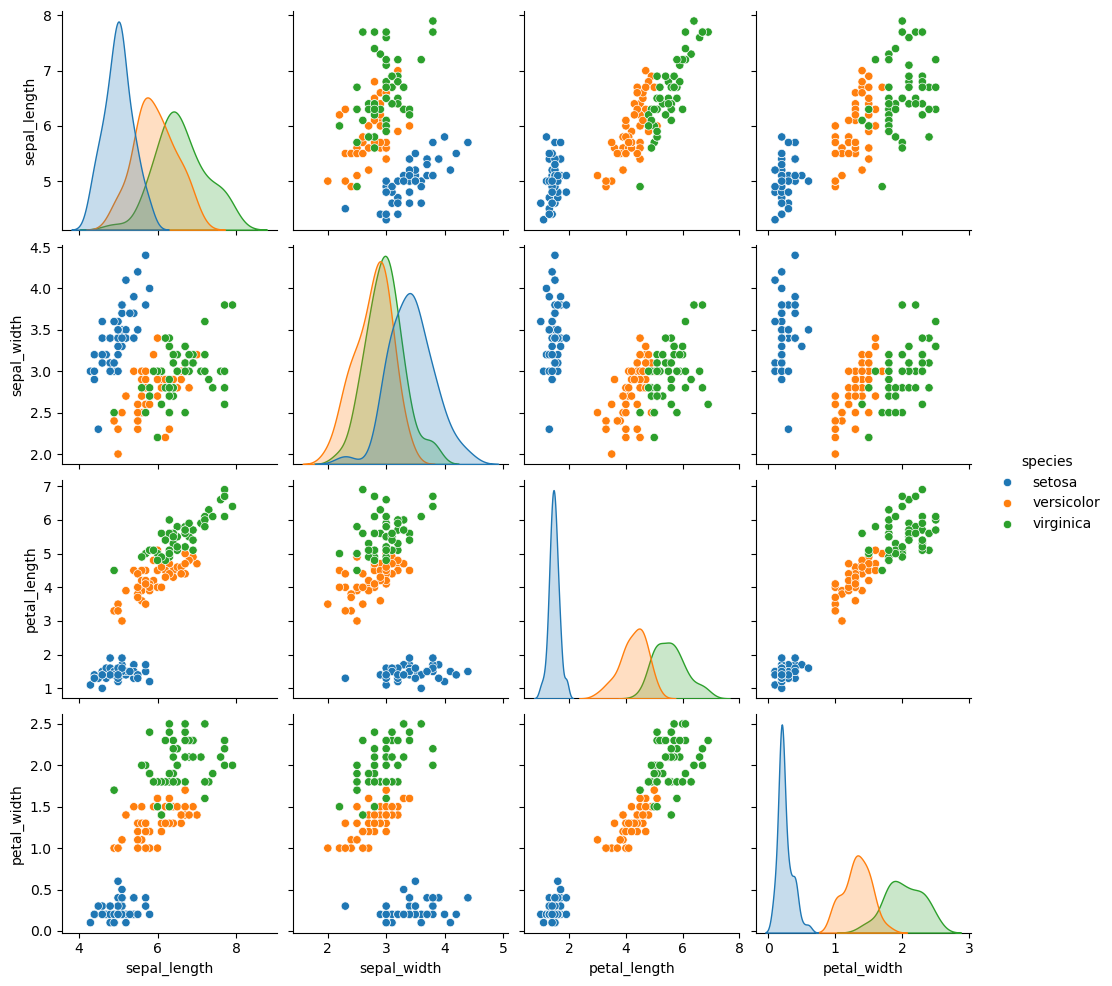

In [9]:
## Pair plot
sns.pairplot(iris, hue = 'species')
plt.show()

In [14]:
# Wybór zmiennych na podstawie korelacji
features_irys = ['petal_width', 'petal_length', 'species']
X_iris = iris[features_irys]

# Dodawanie zmiennych dummy
X_iris = pd.get_dummies(X_iris, drop_first = True)

y_iris = iris['sepal_length']

### Ćwiczenie:
Sprawdź korelację dla zbioru `co2`. 
Które zmienne wybrałbyś do modelowania CO2_Emissions?

In [20]:
co2['Model_Year'].value_counts()

Model_Year
2021    935
Name: count, dtype: int64

In [59]:
co2.loc[:, co2.dtypes != 'object'].corr()

co2_numeric_model_cols = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)', 'Smog_Level']

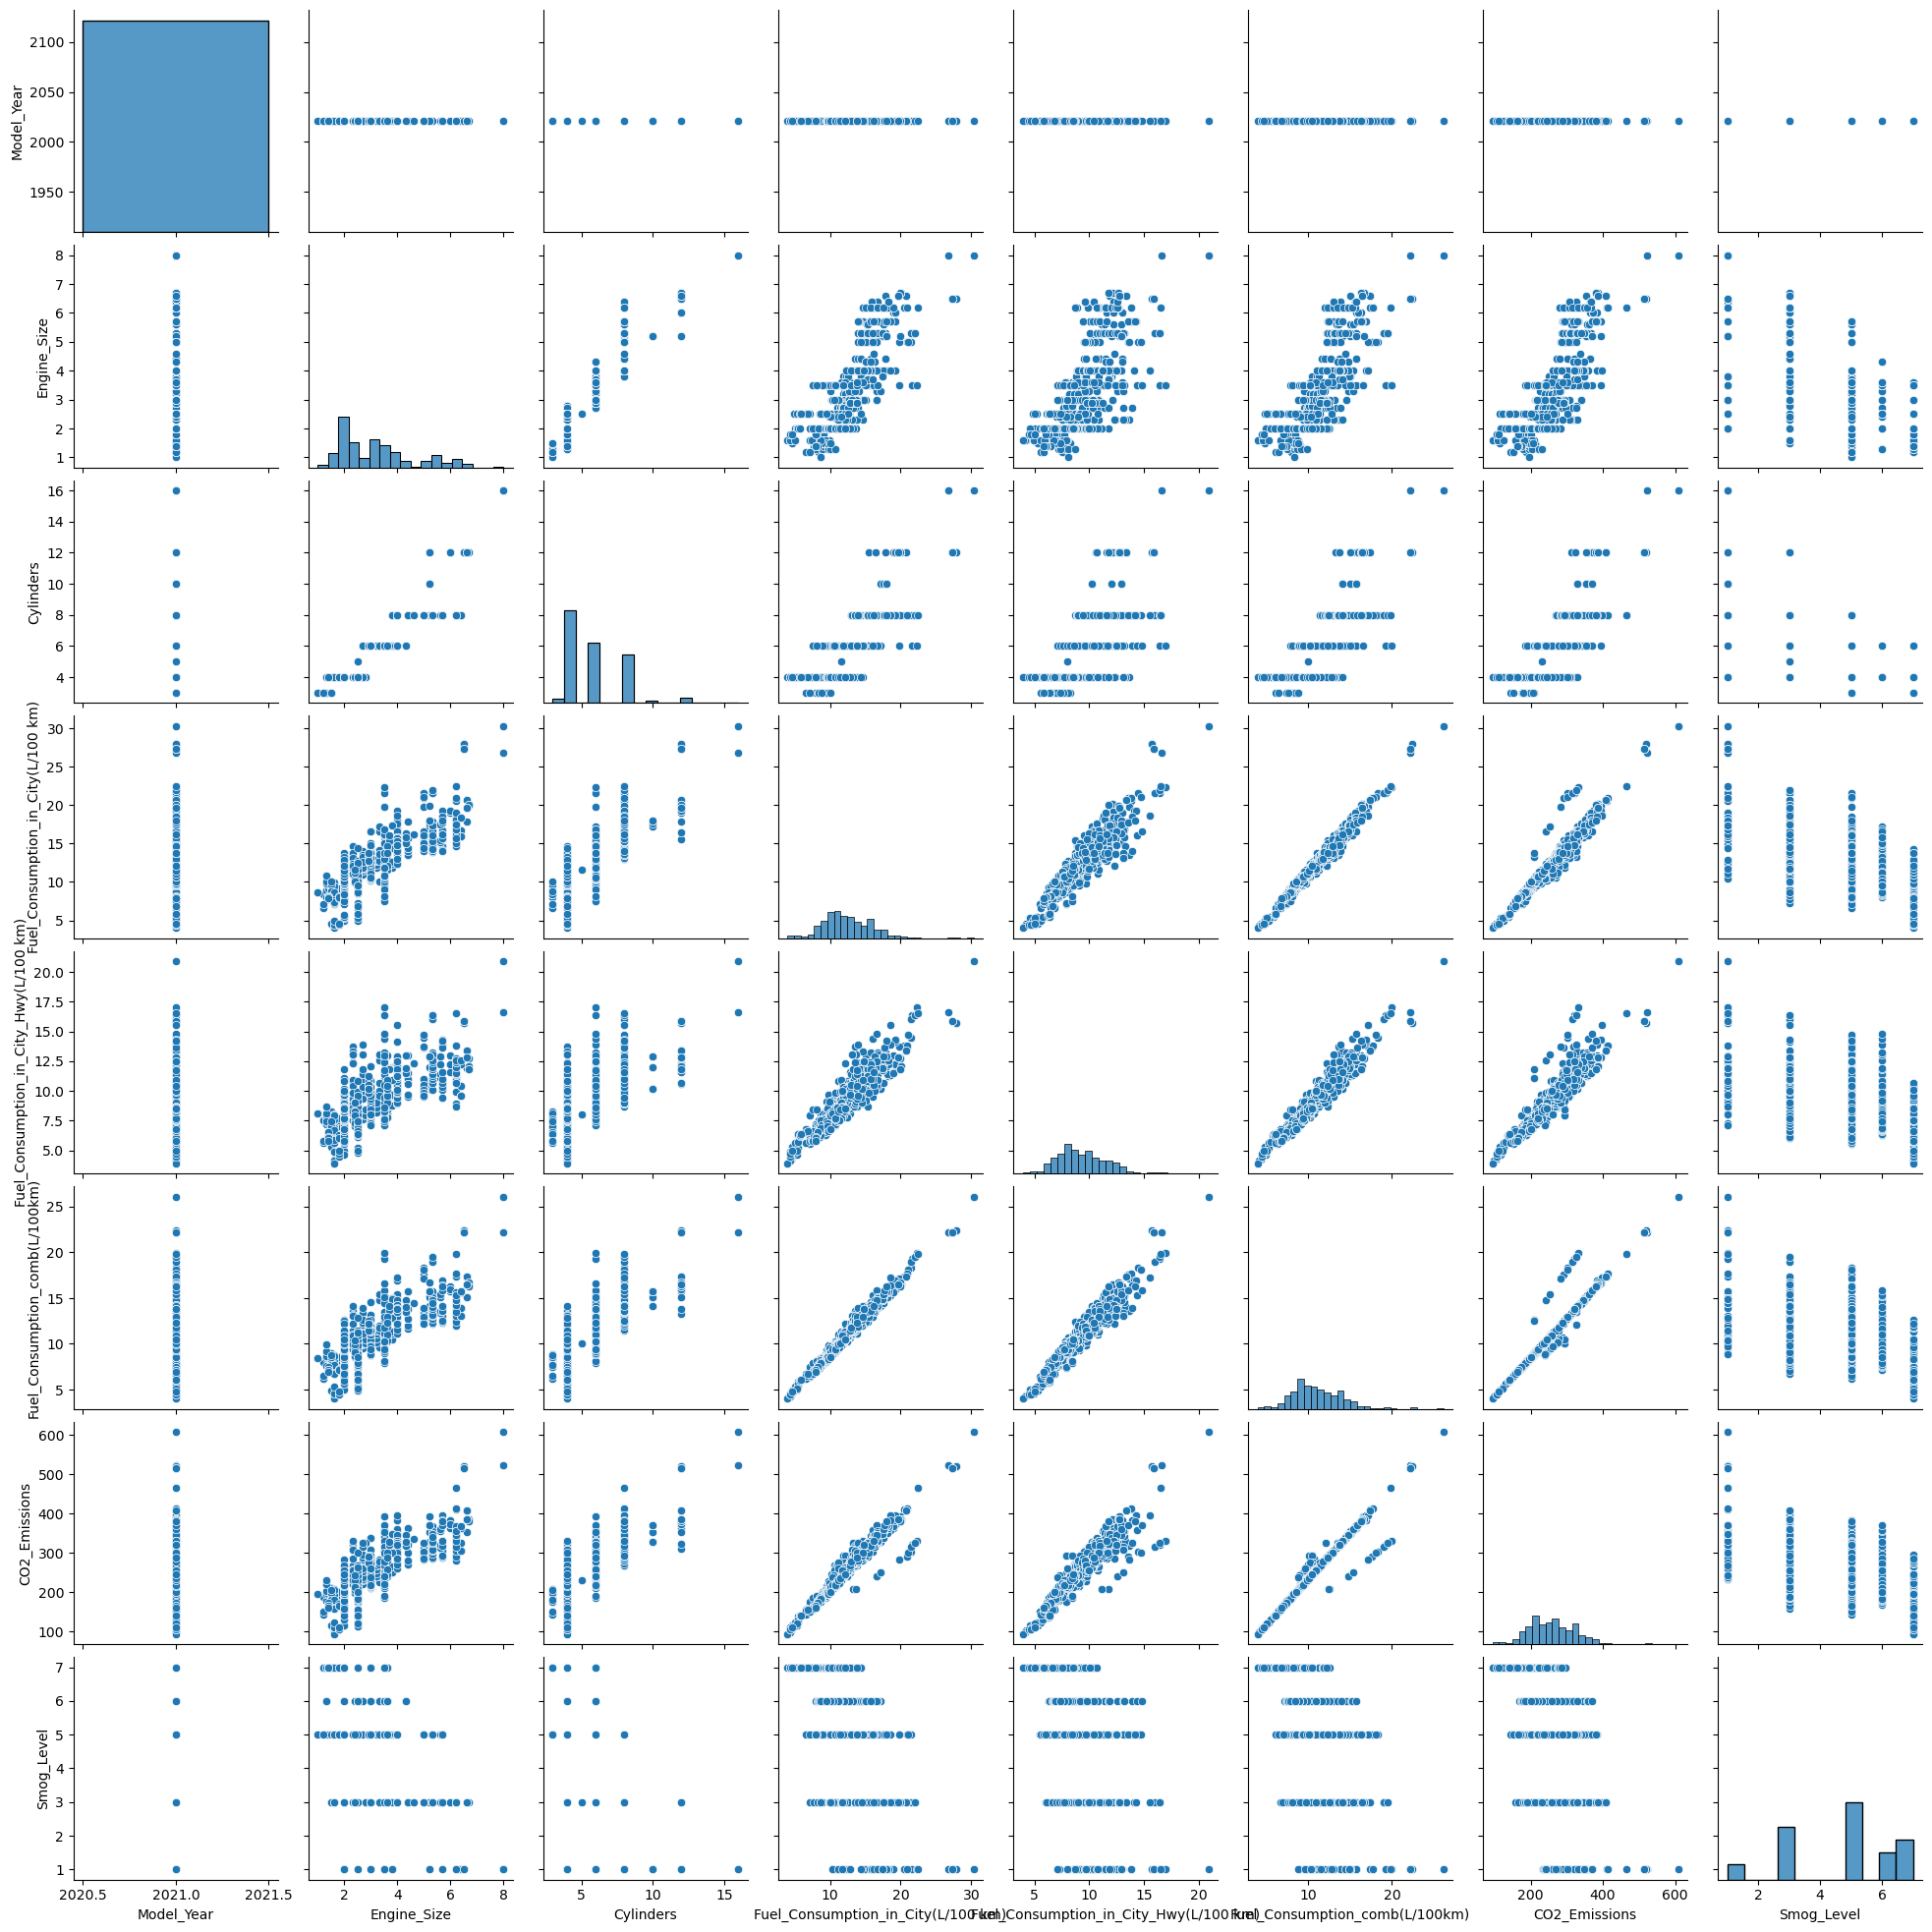

In [21]:
sns.pairplot(co2.loc[:, co2.dtypes != 'object'])
plt.show()

## Podział na zbiory treningowe i testowe (80% trening, 20% test)

In [24]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

### Ćwiczenie:
Podziel zbiór dla `co2`

In [60]:
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(co2[co2_numeric_model_cols], co2['CO2_Emissions'], test_size=0.2, random_state=42)

## Tworzenie i trenowanie modelu regresji liniowej dla IRIS

In [30]:
# Tworzenie modelu
model_iris = LinearRegression()
model_iris.fit(X = X_train_iris, y = y_train_iris)

# Predykcja wartości testowych
y_pred_iris = model_iris.predict(X_test_iris)

In [37]:
model_iris.coef_

array([-0.1314786 ,  0.9778683 , -1.65857536, -2.2063472 ])

In [35]:
X_train_iris

,petal_width,petal_length,species_versicolor,species_virginica
22,0.2,1.0,False,False
15,0.4,1.5,False,False
65,1.4,4.4,True,False
11,0.2,1.6,False,False
42,0.2,1.3,False,False
...,...,...,...,...
71,1.3,4.0,True,False
106,1.7,4.5,False,True
14,0.2,1.2,False,False
92,1.2,4.0,True,False


In [38]:
model_iris.intercept_

3.604303215678032

Model `model_iris` zakłada, że `sepal_length = -0.1314786 * petal_width + 0.9778683  * petal_length -1.65857536 * species_versicolor -2.2063472 * species_virginica + 3.604303215678032`

### Ćwiczenie:
Policz predykcje dla zioru uczącego

In [40]:
y_pred_iris_train = model_iris.predict(X_train_iris)

### Ćwiczenie:
Powtórz kroki dla zbioru `co2`

In [61]:
model_co2 = LinearRegression()
model_co2.fit(X = X_train_co2, y = y_train_co2)

y_pred_co2 = model_co2.predict(X_test_co2)
y_pred_co2_train = model_co2.predict(X_train_co2)

## Obliczenie metryk jakości modelu


In [46]:
rmse_iris = np.sqrt(mean_squared_error(y_test_iris, y_pred_iris))
r2_iris = r2_score(y_test_iris, y_pred_iris)
print(f'IRIS - RMSE: {rmse_iris}')
print(f'IRIS - R2 Score: {np.round(r2_iris,2)}')

IRIS - RMSE: 0.3331274996862634
IRIS - R2 Score: 0.84


### Ćwiczenie:
Oblicz metryki dla zioru treningowego.
Czy widać znaczną różnicę?

In [47]:
rmse_iris_train = np.sqrt(mean_squared_error(y_train_iris, y_pred_iris_train))
r2_iris_train = r2_score(y_train_iris, y_pred_iris_train)
print(f'IRIS - RMSE: {rmse_iris_train}')
print(f'IRIS - R2 Score: {np.round(r2_iris_train,2)}')

IRIS - RMSE: 0.3355977637395782
IRIS - R2 Score: 0.83


### Ćwiczenie:
Usuń kolumnę `species`, wytrenuj model i sprawdź wyniki

In [55]:
X_train_iris

,petal_width,petal_length,species_versicolor,species_virginica
22,0.2,1.0,False,False
15,0.4,1.5,False,False
65,1.4,4.4,True,False
11,0.2,1.6,False,False
42,0.2,1.3,False,False
...,...,...,...,...
71,1.3,4.0,True,False
106,1.7,4.5,False,True
14,0.2,1.2,False,False
92,1.2,4.0,True,False


In [49]:
X_train_iris_no_species = X_train_iris.drop(columns = ['species_versicolor', 'species_virginica'])
X_test_iris_no_species = X_test_iris.drop(columns = ['species_versicolor', 'species_virginica'])

In [52]:
# Tworzenie modelu
model_iris_no_species = LinearRegression()
model_iris_no_species.fit(X = X_train_iris_no_species, y = y_train_iris)

# Predykcja wartości testowych
y_pred_iris_no_species = model_iris_no_species.predict(X_test_iris_no_species)

In [53]:
r2_iris_no_species = r2_score(y_test_iris, y_pred_iris_no_species)
print(f'IRIS - R2 Score: {np.round(r2_iris_train,2)}')

IRIS - R2 Score: 0.83


### Ćwiczenie:
Powtórz kroki dla zbioru `co2`

In [62]:
rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, y_pred_co2))
r2_co2 = r2_score(y_test_co2, y_pred_co2)
print(f'IRIS - RMSE: {rmse_co2}')
print(f'IRIS - R2 Score: {np.round(r2_co2,2)}')

IRIS - RMSE: 15.983085246636389
IRIS - R2 Score: 0.94


In [63]:
rmse_co2_train = np.sqrt(mean_squared_error(y_train_co2, y_pred_co2_train))
r2_co2_train = r2_score(y_train_co2, y_pred_co2_train)
print(f'IRIS - RMSE: {rmse_co2_train}')
print(f'IRIS - R2 Score: {np.round(r2_co2_train,2)}')

IRIS - RMSE: 16.359588692009012
IRIS - R2 Score: 0.94


## Sprawdzanie założeń regresji dla IRIS (normalny rozkład reszt)

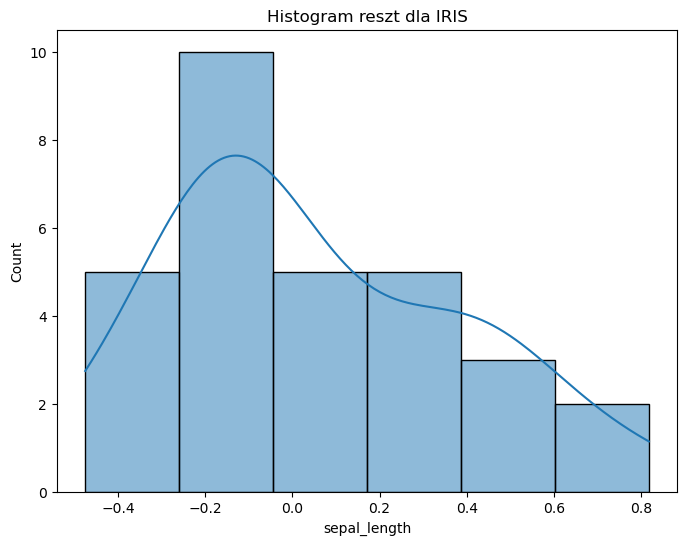

Test Shapiro-Wilka dla Grupy 1: Wartość statystyki = 0.9456, p-wartość = 0.1286
Nie znaleziono podstaw by odrzucić rozkład normalny w danych.


In [65]:
residuals_iris = y_test_iris - y_pred_iris
plt.figure(figsize=(8,6))
sns.histplot(residuals_iris, kde=True)
plt.title("Histogram reszt dla IRIS")
plt.show()

alpha = 0.05
shapiro_test = shapiro(y_test_iris - y_pred_iris)
print(f"Test Shapiro-Wilka dla Grupy 1: Wartość statystyki = {shapiro_test.statistic:.4f}, p-wartość = {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < alpha:
    print("Dane nie mają rozkładu normalnego.")
else:
    print("Nie znaleziono podstaw by odrzucić rozkład normalny w danych.")

## Wizualizacja wyników regresji liniowej

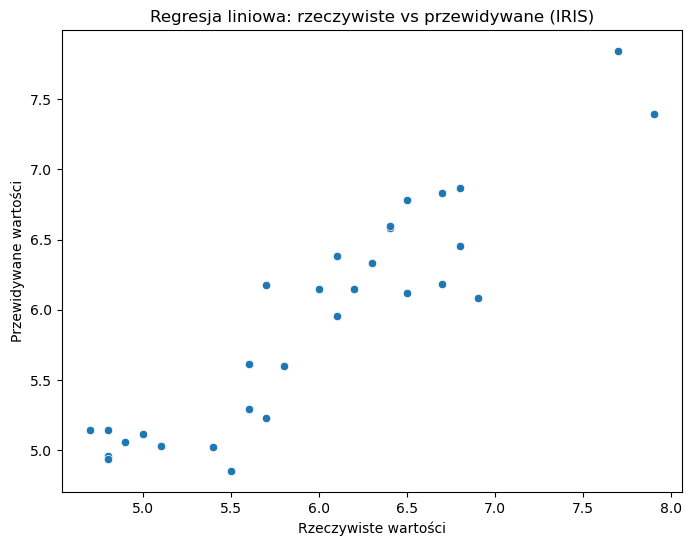

In [66]:
# Wizualizacja wyników regresji liniowej
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_iris, y=y_pred_iris)
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Regresja liniowa: rzeczywiste vs przewidywane (IRIS)")
plt.show()


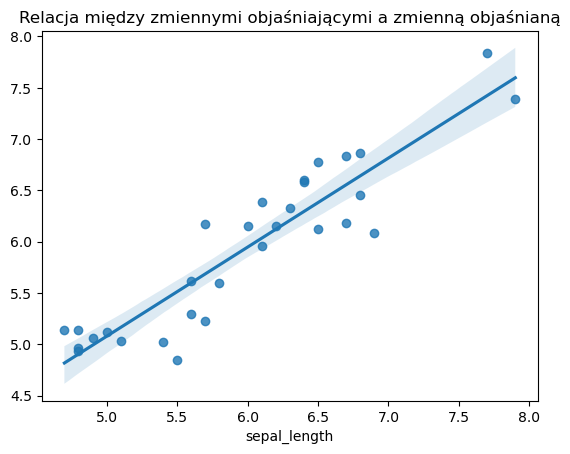

In [68]:
sns.regplot(x = y_test_iris, y=y_pred_iris)
plt.title('Relacja między zmiennymi objaśniającymi a zmienną objaśnianą')
plt.show()

### Ćwiczenie:
Powtórz kroki dla zbioru `co2`

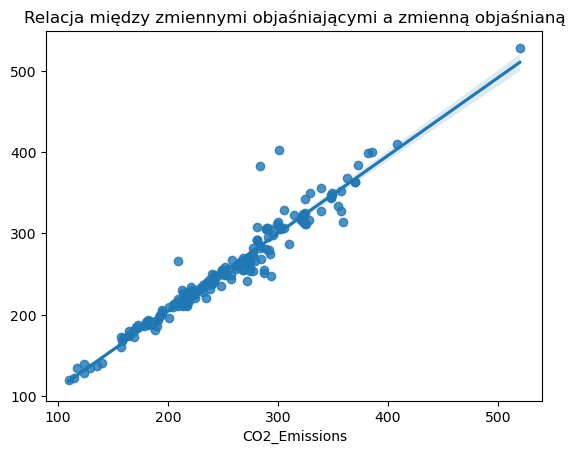

In [69]:
sns.regplot(x = y_test_co2, y=y_pred_co2)
plt.title('Relacja między zmiennymi objaśniającymi a zmienną objaśnianą')
plt.show()

## Reprezentatywność próby

### Ćwiczenie:
Podziel zbiór w alternatywny sposób zostawiającw zbiorze treningowym 2 gatunki, w testowym trzeci

In [85]:
X_train_iris = X_iris.loc[iris['species']!='virginica',:]
X_test_iris = X_iris.loc[iris['species']=='virginica',:]
y_train_iris = y_iris.loc[iris['species']!='virginica']
y_test_iris = y_iris.loc[iris['species']=='virginica']

In [86]:
wrong_lr = LinearRegression()
wrong_lr.fit(X_train_iris, y_train_iris)
y_pred_iris_train = wrong_lr.predict(X_train_iris)
y_pred_iris = wrong_lr.predict(X_test_iris)

In [87]:
rmse_iris = np.sqrt(mean_squared_error(y_test_iris, y_pred_iris))
r2_iris = r2_score(y_test_iris, y_pred_iris)
print(f'IRIS - RMSE test: {rmse_iris}')
print(f'IRIS - R2 Score test: {np.round(r2_iris,2)}')

rmse_iris_train = np.sqrt(mean_squared_error(y_train_iris, y_pred_iris_train))
r2_iris_train = r2_score(y_train_iris, y_pred_iris_train)
print(f'IRIS - RMSE train: {rmse_iris_train}')
print(f'IRIS - R2 Score train: {np.round(r2_iris_train,2)}')

IRIS - RMSE test: 1.761509391930036
IRIS - R2 Score test: -6.83
IRIS - RMSE train: 0.33721695022941667
IRIS - R2 Score train: 0.72
